In [148]:
import pandas as pd 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np


pd.options.mode.chained_assignment = None  # default='warn'


In [2]:
sns.set(context='talk', style='white', rc={'figure.facecolor':'white'}, font_scale=1)
sns.set_style('ticks')

# read in data

based on kaggle data from: https://www.kaggle.com/ronitf/heart-disease-uci

In [6]:
heart = pd.read_csv("heart.csv")  # load kaggle heart data  

In [7]:
# heart["cp"] = np.where(heart["cp"] > 0, 1, 0)  # presence vs absence only 

In [8]:
heart.head() # shows us the first few entries of a dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# decision tree

In [9]:
# here we are separating our data into outcome and input variables 

Y = heart[["cp"]]
X = heart.loc[:, heart.columns != "cp"]

## test train split

In [10]:
# we must split our data into test/train set. 
# Python does this randomly for us, but the random state variable ensures that the same "random"
# set is chosen each time. 
# you can try exploring different test/train percentages. usually people pick this on some set of 
# what's common for their field and the amount of data they have available. 70/30 or 80/20 is common. 

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3, random_state=0)

## run model 

### define model 

In [12]:
clf = DecisionTreeClassifier(random_state=0)

### train

In [13]:
clf = clf.fit(x_train, y_train)

### test

In [15]:
y_pred = clf.predict(x_test)

In [16]:
y_pred

array([2, 2, 0, 0, 3, 0, 0, 2, 0, 0, 1, 1, 3, 2, 2, 2, 1, 2, 0, 0, 2, 2,
       0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 2, 3, 0, 0, 2, 0, 1, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 3, 0, 0, 3, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0])

## evaluate

In [18]:
metrics.accuracy_score(y_test, y_pred)

0.46153846153846156

In [24]:
# a confusion matrix is a helpful way of understanding the number our model 
# is correctly or incorreclty classifying, and whether there is one category the model is favoring
# This can help diagnose problems with the model. For example, it might just classify 
# everything as a control if there isn't enough cases to learn from in the training set 

cnf_matrix = sklearn.metrics.multilabel_confusion_matrix(y_test, y_pred)

In [25]:
cnf_matrix

array([[[28, 22],
        [13, 28]],

       [[66,  8],
        [14,  3]],

       [[48, 15],
        [18, 10]],

       [[82,  4],
        [ 4,  1]]])

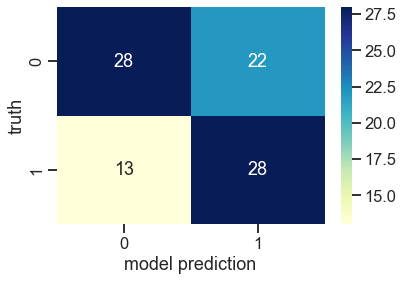

In [26]:
sns.heatmap(pd.DataFrame(cnf_matrix[0]), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show() 

In [28]:
# lastly, we might want to learn about the precision and recall 
# precision (tp/(tp+fp)) -- we are accurately naming cases
# recall (tp/(tp+fn)) -- we aren't missing any cases 
# we want both to be close to 1-- higher the better. in biomedical applications, you want to weigh
# the two against each other, you want to catch a lot of cases, but you don't want to classify
# a person as having a disease if they don't have it 

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.68      0.62        41
           1       0.27      0.18      0.21        17
           2       0.40      0.36      0.38        28
           3       0.20      0.20      0.20         5

    accuracy                           0.46        91
   macro avg       0.36      0.35      0.35        91
weighted avg       0.44      0.46      0.44        91



## visualize tree

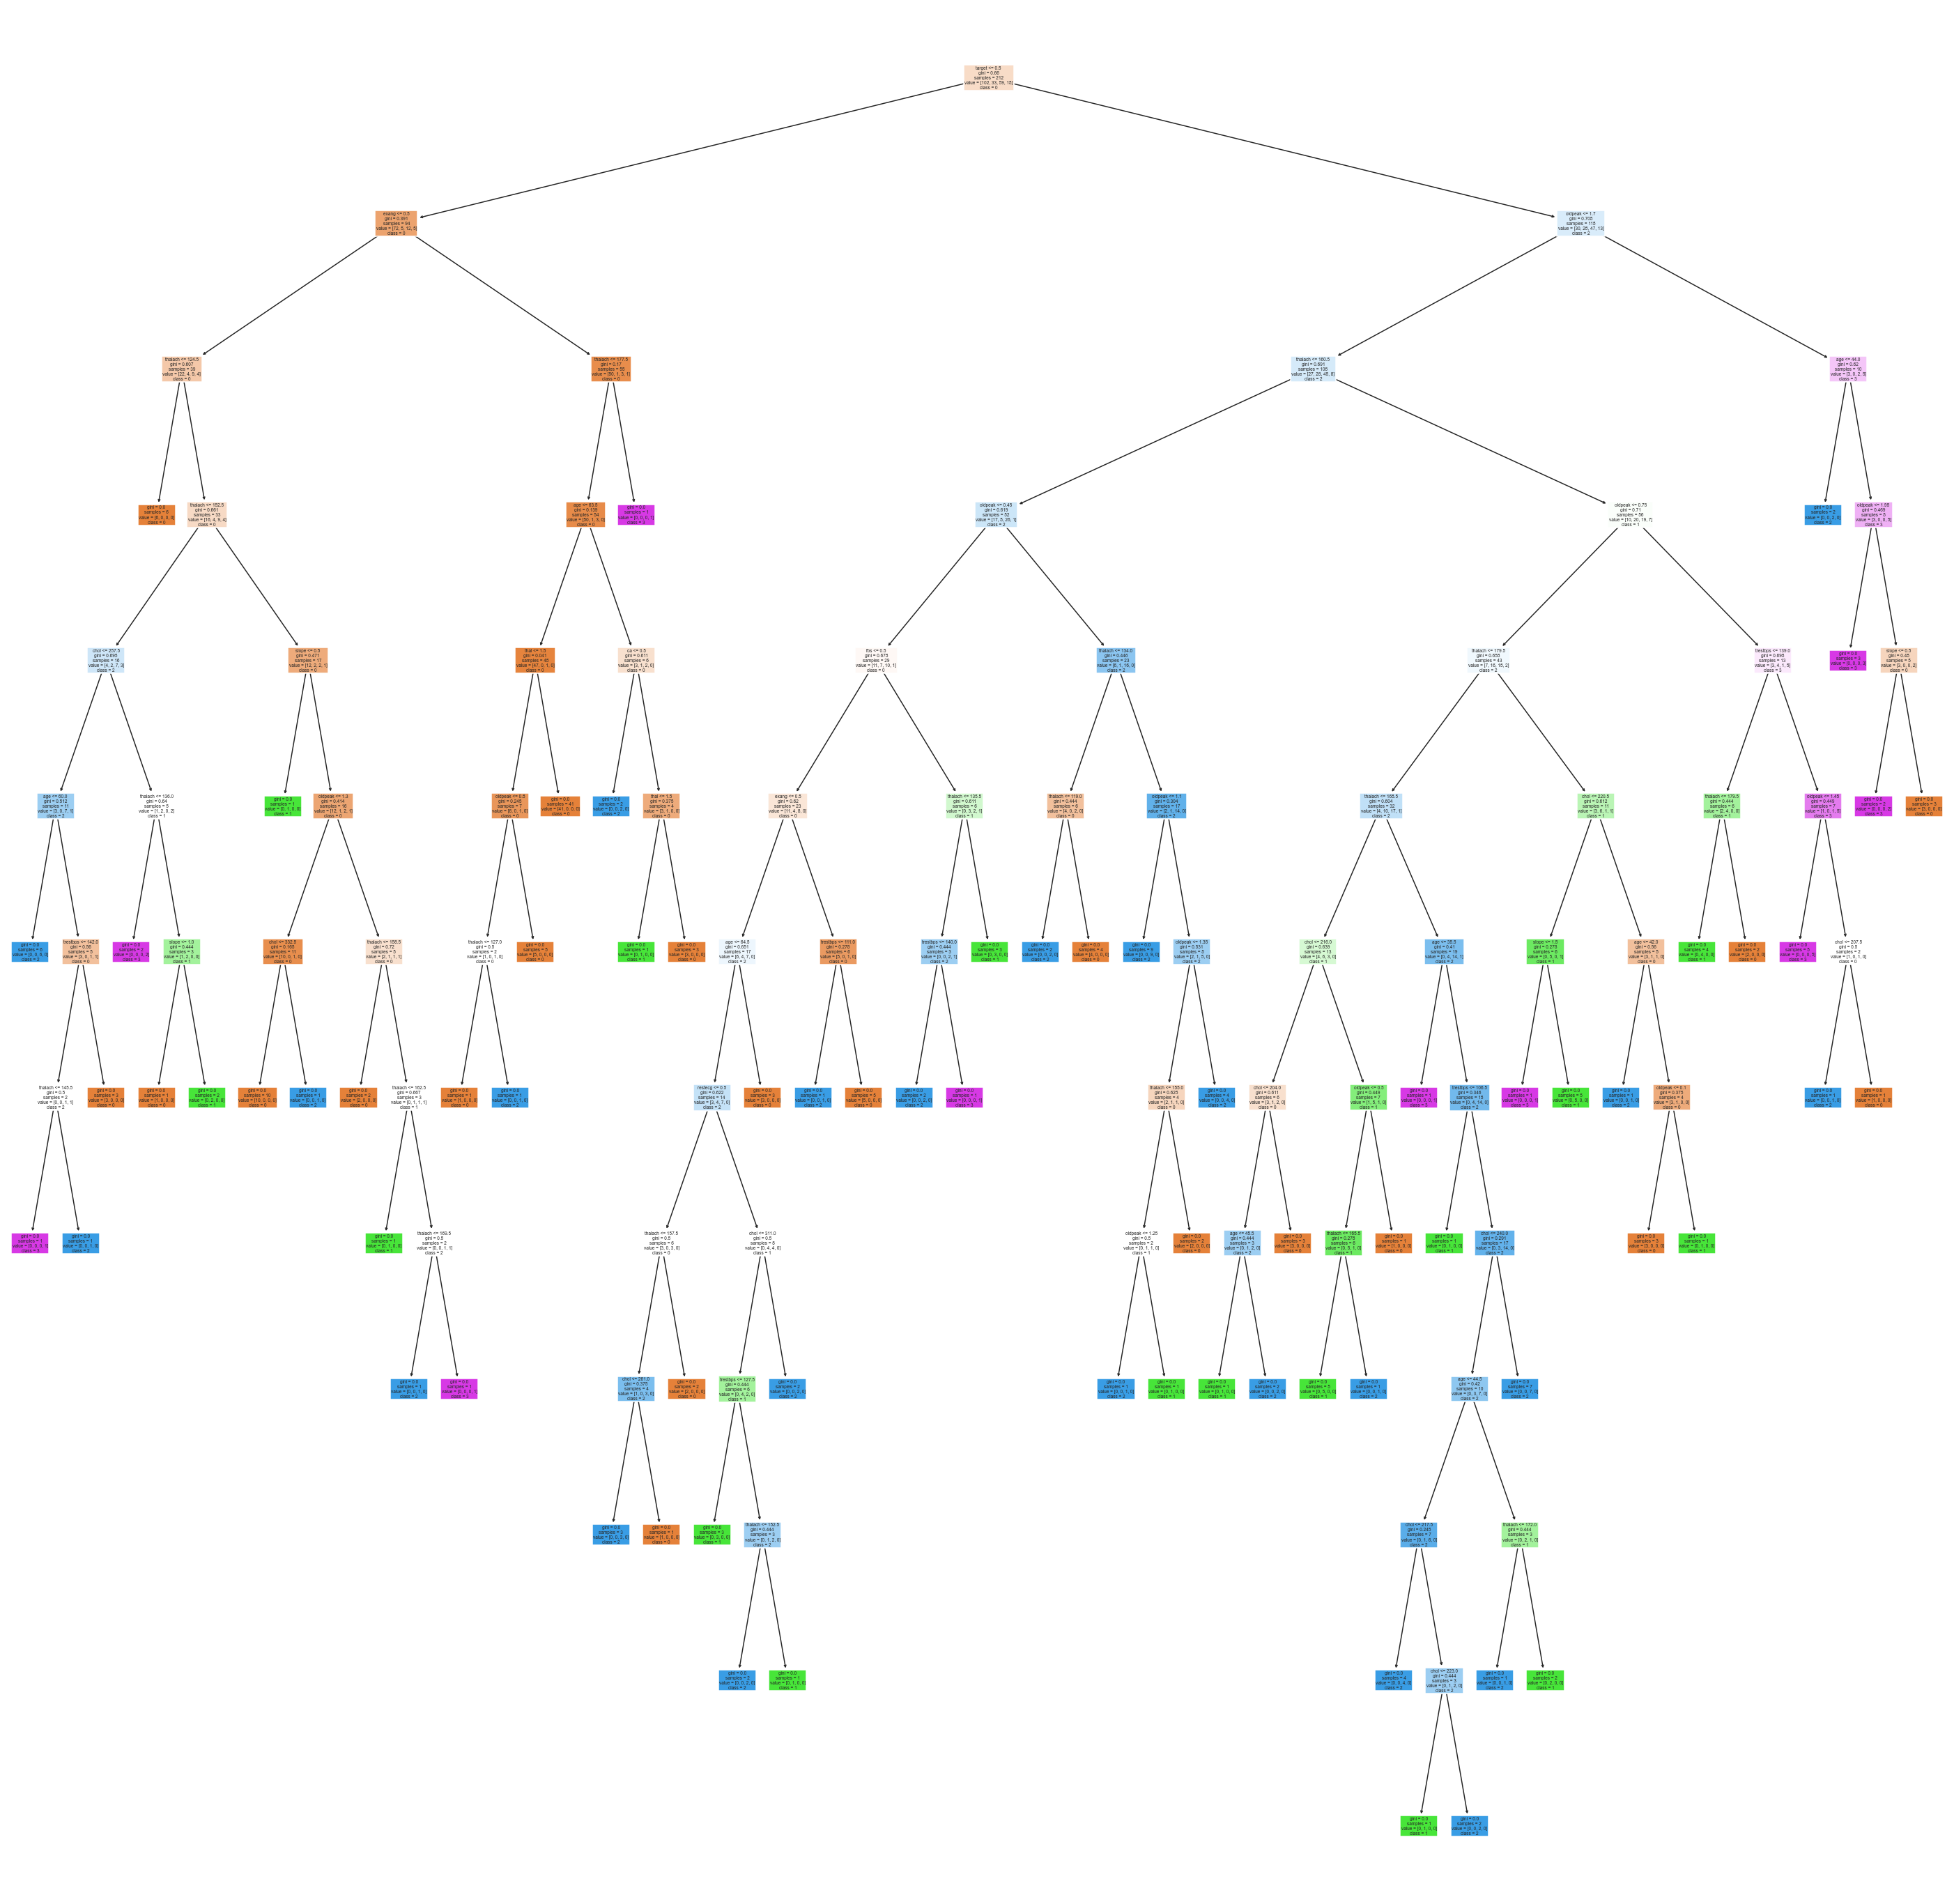

In [46]:
fig = plt.figure(figsize=(50, 50))
plot_tree(clf, feature_names=list(heart.loc[:, heart.columns != "cp"]),
          class_names=["0", "1", "2", "3"], filled=True)
plt.show()

# gradient boosting 

In [143]:
clf = GradientBoostingClassifier(n_estimators=20, random_state=0, 
                                 learning_rate=1, min_samples_split=2)

In [144]:
clf = clf.fit(x_train, y_train.values.reshape(-1))

In [145]:
y_pred = clf.predict(x_test)

## accuracy

In [146]:
clf.score(x_test, y_test)

0.5274725274725275

# random forest

In [152]:
clf = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0)

In [153]:
clf = clf.fit(x_train, y_train.values.reshape(-1))

In [154]:
clf.score(x_test, y_test)

0.5714285714285714